In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/survey_results_public.csv")
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [3]:
# დავპრინტოთ პირველი 100 სტრიქონი
df.head(100)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,I agree,I am a developer by profession,18-24 years old,"Employed, full-time",In-person,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Hackathons (virtual or ...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,371.0
96,97,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague,NaN,...,1-2 times a week,3-5 times a week,1-2 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,Retail and Consumer Services,Too long,Neither easy nor difficult,86528.0
97,98,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Hobby,Some college/university study without earning ...,Colleague;Online Courses or Certification;On t...,NaN,...,1-2 times a week,Never,Never,60-120 minutes a day,30-60 minutes a day,DevOps function,"Information Services, IT, Software Development...",Appropriate in length,Neither easy nor difficult,NaN
98,99,I agree,I am a developer by profession,35-44 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Formal documentation provided by the owner of ...,...,NaN

In [4]:
# შევამოწმოთ დატაფრეიმის სვეტები
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [5]:
# გამოვიტანოთ სასურველი სვეტი
learned_online = df["LearnCodeOnline"]
learned_online

0                                                      NaN
1        Formal documentation provided by the owner of ...
2        Formal documentation provided by the owner of ...
3        Formal documentation provided by the owner of ...
4        Formal documentation provided by the owner of ...
                               ...                        
89179    Formal documentation provided by the owner of ...
89180    Formal documentation provided by the owner of ...
89181                                                  NaN
89182    Formal documentation provided by the owner of ...
89183    Formal documentation provided by the owner of ...
Name: LearnCodeOnline, Length: 89184, dtype: object

In [6]:
# დავაინდექსოთ დატაფრეიმი
df.set_index("ResponseId", inplace=True)

In [7]:
# გავფილტორთ დატა ასაკისა და სამუშაო გამოცდილების მიხედვით
filt = (df['Age'] == '18-24 years old') & (df['WorkExp']>5)
df.loc[filt]


,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
115,I agree,I am a developer by profession,18-24 years old,"Employed, full-time;Independent contractor, fr...",In-person,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;On t...,Formal documentation provided by the owner of ...,Udemy,...,NaN,NaN,NaN,60-120 minutes a day,60-120 minutes a day,DevOps function;Continuous integration (CI) an...,Higher Education,Too long,Neither easy nor difficult,NaN
165,I agree,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Friend or family member;Online Courses or Cert...,Formal documentation provided by the owner of ...,Udemy;Coursera,...,Never,1-2 times a week,1-2 times a week,15-30 minutes a day,15-30 minutes a day,Microservices,"Information Services, IT, Software Development...",Appropriate in length,Easy,52046.0
249,I agree,I am a developer by profession,18-24 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Boots...,Some college/university study without earning ...,Other (please specify):,NaN,NaN,...,3-5 times a week,3-5 times a week,1-2 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Neither easy nor difficult,223449.0
258,I agree,I am a developer by profession,18-24 years old,"Employed, part-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Sch...,NaN,NaN,...,1-2 times a week,1-2 times a week,1-2 times a week,30-60 minutes a day,15-30 minutes a day,None of these,"Information Services, IT, Software Development...",Too short,Easy,16063.0
283,I agree,I am a developer by profession,18-24 years old,"Employed, full-time",In-person,Bootstrapping a business;Professional developm...,Some college/university study without earning ...,On the job training;Other online resources (e....,Formal documentation provided by the owner of ...,NaN,...,Never,10+ times a week,1-2 times a week,15-30 minutes a day,60-120 minutes a day,DevOps function;Microservices;Observability to...,"Information Services, IT, Software Development...",Too long,Easy,7087.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88667,I agree,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time",In-person,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;On t...,Formal documentation provided by the owner of ...,Udemy,...,3-5 times a week,10+ times a week,1-2 times a week,60-120 minutes a day,30-60 minutes a day,DevOps function;Continuous integration (CI) an...,"Information Services, IT, Software Development...",Appropriate in length,Neither easy nor difficult,NaN
88745,I agree,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",Books / Physical media;Other online resources ...,Formal documentation provided by the owner of ...,NaN,...,1-2 times a week,10+ times a week,1-2 times a week,30-60 minutes a day,15-30 minutes a day,Microservices;Automated testing;Continuous int...,Higher Education,Appropriate in length,Easy,14607.0
88884,I agree,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Freelance/contract work,"Secondary school (e.g. American 

In [8]:
# დავასორტიროთ დატაფრეიმი ასაკისა და წლიური შემოსავლის მიხედვით
df.sort_values(by=['Age', 'ConvertedCompYearly'], ascending=[True, False])


,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
53269,I agree,I am a developer by profession,18-24 years old,"Independent contractor, freelancer, or self-em...","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Boots...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Friend or family member;Online Courses or Cert...,Formal documentation provided by the owner of ...,NaN,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,Developer portal or other central places to fi...,"Information Services, IT, Software Development...",Appropriate in length,Neither easy nor difficult,74351432.0
80587,I agree,I am a developer by profession,18-24 years old,"Employed, full-time;Independent contractor, fr...","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Hackathons (virtual or in-person);Other online...,Formal documentation provided by the owner of ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,11000000.0
34997,I agree,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Formal documentation provided by the owner of ...,NaN,...,1-2 times a week,1-2 times a week,1-2 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Automated testing;Continuous i...,Healthcare,Appropriate in length,Neither easy nor difficult,7435143.0
82593,I agree,I am a developer by profession,18-24 years old,"Independent contractor, freelancer, or self-em...",Remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Blogs with tips and tricks;How-to videos;Video...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,2141791.0
81524,I agree,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Other;Udemy,...,1-2 times a week,1-2 times a week,1-2 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Neither easy nor difficult,2028761.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89066,I agree,I code primarily as a hobby,Under 18 years old,"Not employed, and not looking for work",NaN,NaN,Primary/elementary school,Books / Physical media;Colleague;Online Course...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN
89075,I agree,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,NaN,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
89097,I agree,I am learning to code,Under 18 years old,"Not employed, and not looking for work",NaN,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Recorded coding sessions;How-to videos;Click t...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN


In [9]:
# დავითვალოთ გამოცდილი დეველოპერების მინიმალური და მაქსიმალური ხელფასები
filt = df['WorkExp']>10
filtered_df = df.loc[filt]
max_salary = max(filtered_df.CompTotal)
min_salary = min(filtered_df.CompTotal)
min_salary, max_salary

(0.0, 1e+21)

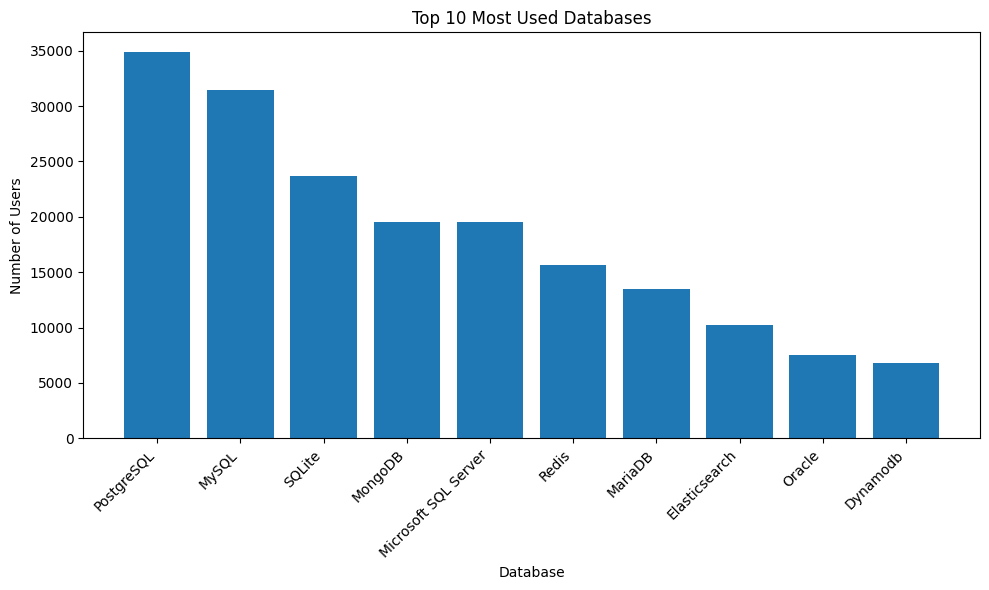

In [10]:
# ავაგოთ ჩარტი: ტოპ 10 დატაბეისი რომელთანაც დეველოპერებს უმუშავიათ
df_copy = df.copy()
df_copy['DatabaseHaveWorkedWith'] = df_copy['DatabaseHaveWorkedWith'].fillna('')
df_copy['DatabaseHaveWorkedWith'] = df_copy['DatabaseHaveWorkedWith'].str.split(';')

database_counts = {}

for databases in df_copy['DatabaseHaveWorkedWith']:
    for database in databases:
        if database:
            database_counts[database] = database_counts.get(database, 0) + 1

database_counts = dict(sorted(database_counts.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
plt.bar(list(database_counts.keys())[:10], list(database_counts.values())[:10])
plt.title('Top 10 Most Used Databases')
plt.xlabel('Database')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

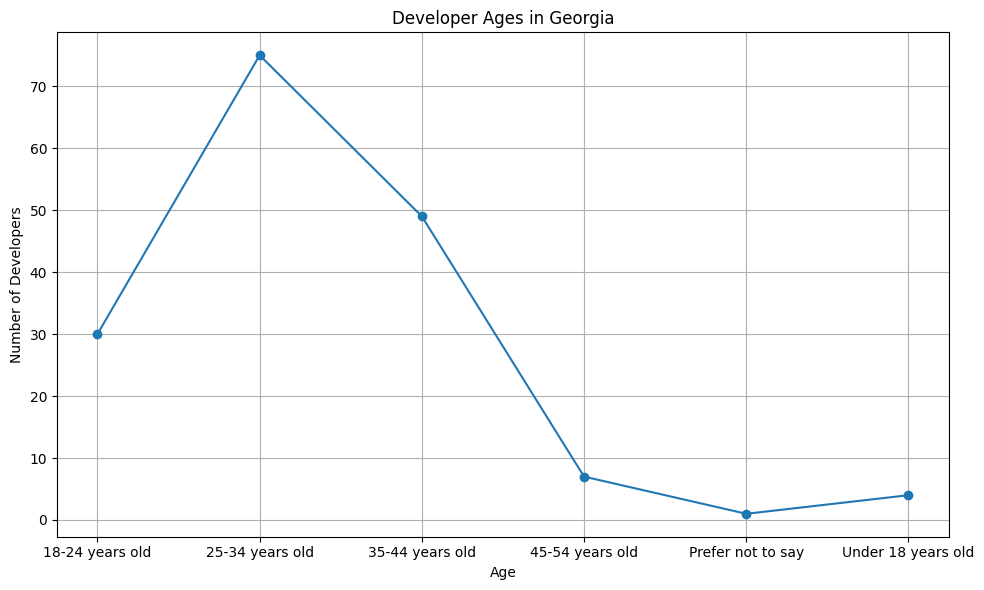

In [11]:
# ავაგოთ ჩარტი: ქართველი დეველოპერები ასაკის მიხედვით
georgia_data = df[df['Country'] == 'Georgia']

georgia_data = georgia_data.dropna(subset=['Age'])

plt.figure(figsize=(10, 6))
plt.plot(georgia_data['Age'].value_counts().sort_index(), marker='o', linestyle='-')
plt.title('Developer Ages in Georgia')
plt.xlabel('Age')
plt.ylabel('Number of Developers')
plt.grid(True)
plt.tight_layout()
plt.show()